In [1]:
using PyPlot

In [2]:
"""plot line y = w*x+b"""
function plotline(w::Number,b::Number;
                  xmin=-100,xmax=100)
    xsamples = [xmin, xmax]
    plot(xsamples, [w*x+b for x in xsamples], color="black")
end
plotline(w::Array{Float64,1}; kwargs...) = 
    plotline(w[1], w[2], kwargs...)

plotline (generic function with 2 methods)

In [3]:
"""plot function y=f(x)"""
function plotfunc(f;
                  xmin=-100,xmax=100,nsamples=100)
    xsamples = linspace(xmin,xmax,nsamples)
    plot(xsamples, [f(x) for x in xsamples], color="black")
end

plotfunc

In [4]:
# proximal gradient method
include("proxgrad.jl")
using LowRankModels

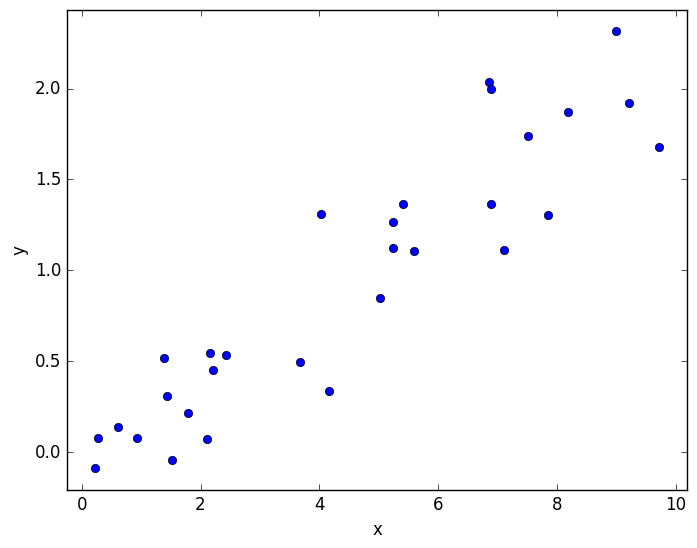

(-0.24743830553517399,10.188192417379238)

In [5]:
# Generate and plot data
srand(2)
n = 30
function sample_data(num_points)
    x = rand(num_points)*10
    y = .2*x + .3*randn(num_points)
    return x,y
end
x,y = sample_data(n)

"""function to plot the above data"""
function plotdata(x=x,y=y; margin=.05)
    hold(true)
    plot(x,y,"o")
    xlabel("x")
    ylabel("y")
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    ylim([minimum(y)-margin*range_y,maximum(y)+margin*range_y])
    xlim([minimum(x)-margin*range_x,maximum(x)+margin*range_x])
end
plotdata()

In [6]:
# mess up the data
outliers=false
if outliers
    y[3] = 5
    y[4] = -2
end

# Least squares

In [7]:
n = length(y)
X = [x ones(length(x))]
w_quad = proxgrad(1/n*QuadLoss(), ZeroReg(), X, y, maxiters=200)

2-element Array{Float64,1}:
  0.225633 
 -0.0785369

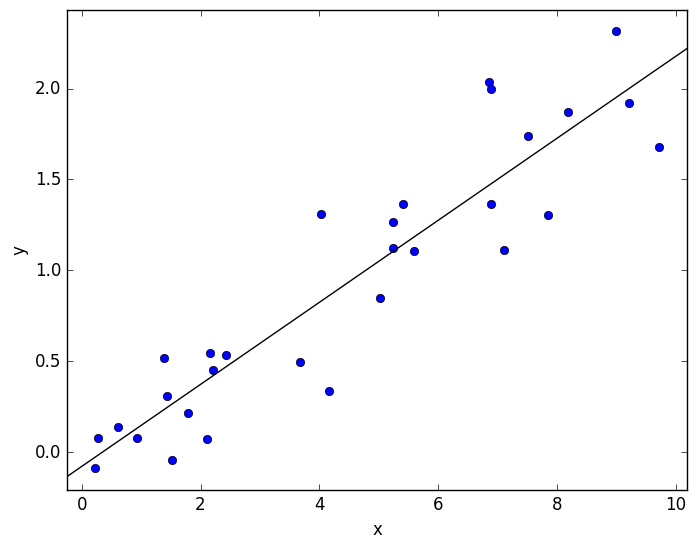

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31be29a50>

In [8]:
# plot the fit
clf() # clears the previous figure
plotdata()
plotline(w_quad)

# ℓ_1 regression

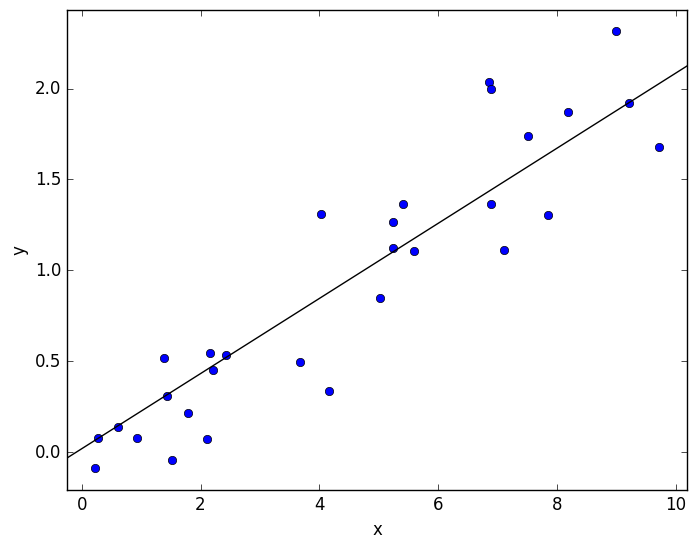

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31bf6bd50>

In [9]:
w_l1 = proxgrad(1/n*L1Loss(), ZeroReg(), X, y, 
                maxiters=200)

# plot the fit
clf() # clears the previous figure
plotdata()
plotline(w_l1)

# Huber regression

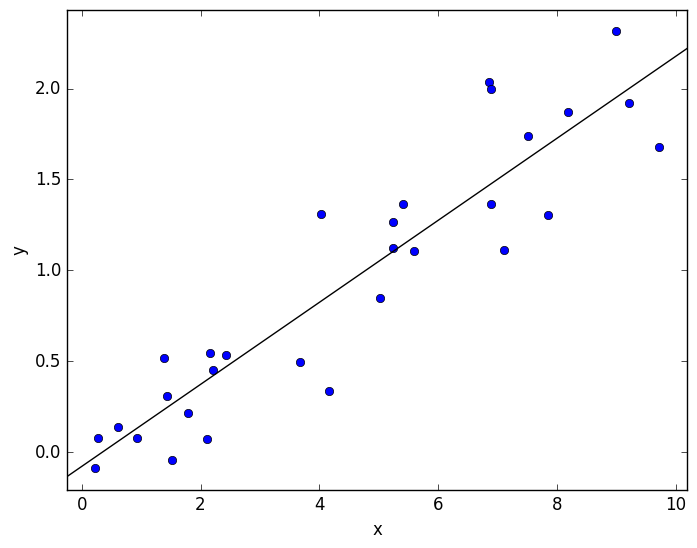

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c0ff690>

In [10]:
w_huber = proxgrad(1/n*HuberLoss(), ZeroReg(), X, y, maxiters=200)

# plot the fit
clf() # clears the previous figure
plotdata()
plotline(w_huber)

In [11]:
# Quantile regression

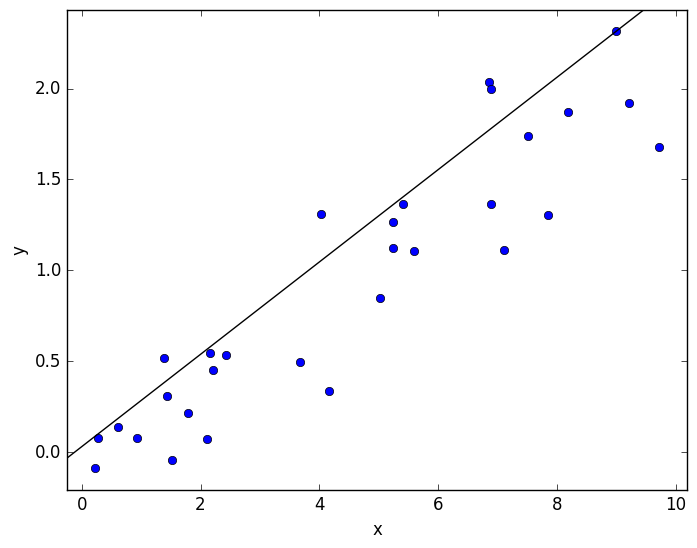

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c1f2f90>

In [12]:
w_10 = proxgrad(1/n*QuantileLoss(quantile=.8), ZeroReg(), X, y, maxiters=1000)

# plot the fit
clf() # clears the previous figure
plotdata()
plotline(w_10)

In [13]:
@show w_quad
@show w_l1
@show w_huber
@show w_10

w_quad = [0.225633,-0.0785369]
w_l1 = [0.206646,0.0188461]
w_huber = [0.225625,-0.0784878]
w_10 = [0.253987,0.0301998]


2-element Array{Float64,1}:
 0.253987 
 0.0301998

# Plot quantiles of distribution

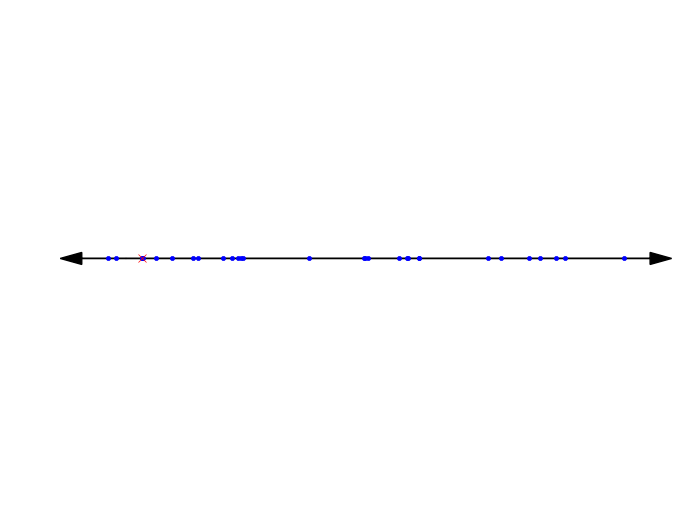

PyObject <matplotlib.patches.FancyArrow object at 0x31f4ed310>

  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/madeleine/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
i

In [14]:
q = .1
l = QuantileLoss(quantile=q)
ch = ConvergenceHistory("quantile")
w_nocov = proxgrad(1/n*l, ZeroReg(), ones(n,1), y, stepsize=.9, maxiters=50, ch=ch)

clf() # clears the previous figure
plot(y, zeros(n), ".")
plot(w_nocov, 0, "rx")
axis("off")
ylim(-1,1)
m,M = minimum(y), maximum(y)
xlim(minimum(y)-(M-m)/10, maximum(y)+(M-m)/10)
arrow(0, 0, maximum(y)+(M-m)/20, 0, head_width=0.05, head_length=0.1, fc="k", ec="k")
arrow(0, 0, minimum(y)-(M-m)/20, 0, head_width=0.05, head_length=0.1, fc="k", ec="k")
# savefig("quantile_$(q).pdf")